In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Dimensioni delle immagini
img_height, img_width = 200, 200

# Generatore di dati per il training set
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'TRAINING',
    target_size=(img_height, img_width),
    batch_size=56,
    class_mode='categorical')

# Generatore di dati per il test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'TEST',
    target_size=(img_height, img_width),
    batch_size=24,
    class_mode='categorical')

# Ordinamento delle immagini in base al nome
sorted_test_dataset = sorted(test_generator.filenames)

# Ordinamento effettivo
sorted_test_dataset = sorted(sorted_test_dataset, key=lambda x: int(x.split('/')[0]))

labels = test_generator.class_indices
label_names = list(labels.keys())

Found 280 images belonging to 5 classes.


Found 120 images belonging to 5 classes.


In [11]:
# Definisci la tua CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 classi
])

/home/mrheltic/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compila il modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Addestra il modello
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

Epoch 1/10


/home/mrheltic/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.2530 - loss: 4.0907 - val_accuracy: 0.2167 - val_loss: 1.6099
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.1834 - loss: 1.6425 - val_accuracy: 0.3750 - val_loss: 1.5131
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.3987 - loss: 1.5081 - val_accuracy: 0.3000 - val_loss: 1.3789
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.4278 - loss: 1.3184 - val_accuracy: 0.4917 - val_loss: 1.2156
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5367 - loss: 1.1468 - val_accuracy: 0.6333 - val_loss: 0.9129
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6950 - loss: 0.8306 - val_accuracy: 0.7750 - val_loss: 0.6449
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.8379 - loss: 0.5454 - val_accuracy: 0.7917 - val_loss: 0.5085
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.8489 - loss: 0.3751 - val_accuracy: 0.9083 - val_loss: 0.2763
Epoch 9/10
5/5 ━━━━

5/5 - 1s - 284ms/step - accuracy: 0.9667 - loss: 0.0999
Accuracy sul test set: 96.67%


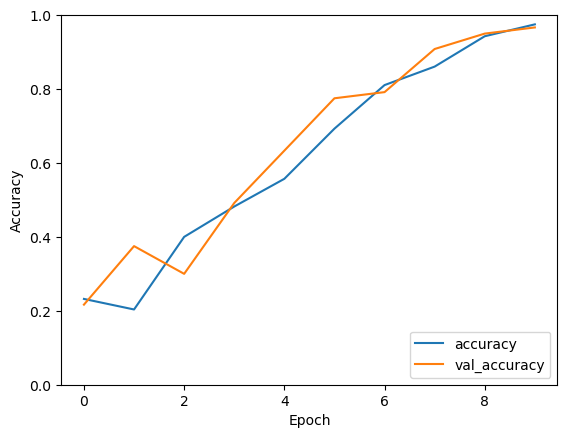

In [13]:
# Valuta il modello
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"Accuracy sul test set: {test_acc * 100:.2f}%")

# Visualizza i risultati del test
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [14]:
# Estrai le predizioni, ovvero il valore massimo per ogni array nell'array preds ed estraendo l'indice
preds = model.predict(test_generator)
predictions = np.argmax(preds, axis=1)

# Mostra le occorrenze di ogni classe
unique, counts = np.unique(predictions, return_counts=True)
occurrences = dict(zip(unique, counts))
print(occurrences)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step
{0: 24, 1: 28, 2: 22, 3: 22, 4: 24}


In [15]:
model.save('CNN_Test.keras')